##**Repo Setup & Synthetic Data Creation**

We need 3 datasets: customers, products, orders.
They’ll simulate a small e-commerce company’s data.

We simulate 999 customers, 500 products, 5000 orders.

customers has demographics + signup_date.

products has category, brand, cost, and price.

orders links customers to products with date + quantity.

These are three separate data sources, just like in a consulting case.

In [13]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# -----------------------------
# Generate Customers Dataset
# -----------------------------
n_customers = 999

customer_ids = range(1, n_customers+1)
names = [f"Customer_{i}" for i in customer_ids]
ages = np.random.randint(18, 65, n_customers)
genders = np.random.choice(["Male", "Female"], n_customers, p=[0.35, 0.65])
locations = np.random.choice(["Amsterdam", "Rotterdam", "Utrecht", "Eindhoven", "Groningen", "Accra", "Lagos", "Tokyo"], n_customers)
signup_dates = [datetime(2020,1,1) + timedelta(days=random.randint(0, 1500)) for _ in range(n_customers)]

customers = pd.DataFrame({
    "customer_id": customer_ids,
    "name": names,
    "age": ages,
    "gender": genders,
    "location": locations,
    "signup_date": signup_dates
})

# -----------------------------
# Generate Products Dataset
# -----------------------------
n_products = 500

product_ids = range(1, n_products+1)
categories = np.random.choice(["Electronics", "Clothing", "Home", "Sports", "Books","Luxury"], n_products)
brands = [f"Brand_{random.randint(1,20)}" for _ in product_ids]
costs = np.random.randint(5, 200, n_products)
prices = costs + np.random.randint(5, 200, n_products)

products = pd.DataFrame({
    "product_id": product_ids,
    "category": categories,
    "brand": brands,
    "cost": costs,
    "price": prices
})

# -----------------------------
# Generate Orders Dataset
# -----------------------------
n_orders = 5000

order_ids = range(1, n_orders+1)
order_dates = [datetime(2021,1,1) + timedelta(days=random.randint(0, 1000)) for _ in range(n_orders)]
order_customer_ids = np.random.choice(customers["customer_id"], n_orders)
order_product_ids = np.random.choice(products["product_id"], n_orders)
quantities = np.random.randint(1, 5, n_orders)

orders = pd.DataFrame({
    "order_id": order_ids,
    "customer_id": order_customer_ids,
    "product_id": order_product_ids,
    "order_date": order_dates,
    "quantity": quantities
})

# -----------------------------
# Save CSVs
# -----------------------------
customers.to_csv("/content/drive/MyDrive/github/ead/data/customers.csv", index=False)
products.to_csv("/content/drive/MyDrive/github/ead/data/products.csv", index=False)
orders.to_csv("/content/drive/MyDrive/github/ead/data/orders.csv", index=False)

print("✅ Synthetic data generated and saved in /data folder")


✅ Synthetic data generated and saved in /data folder


##**Data Cleaning & Transformation (ETL)**

Now let’s clean, merge, and prepare the data.

We check for missing values.

Standardize column names → always a consulting best practice.

Feature engineering:

sales_value, profit (business KPIs).

customer_tenure_days (time since signup).

We merge all three sources → simulates “connecting data sources.”

Final output = cleaned_dataset.csv, ready for analysis.

In [40]:
#import pandas as pd

# Load datasets
customers = pd.read_csv("/content/drive/MyDrive/github/ead/data/customers.csv", parse_dates=["signup_date"])
products = pd.read_csv("/content/drive/MyDrive/github/ead/data/products.csv")
orders = pd.read_csv("/content/drive/MyDrive/github/ead/data/orders.csv", parse_dates=["order_date"])

# -----------------------------
# 1. Quick sanity check
# -----------------------------
print(customers.head())
print(products.head())
print(orders.head())

# -----------------------------
# 2. Handle missing values
# -----------------------------
print("Missing values:\n")
print(customers.isnull().sum())
print(products.isnull().sum())
print(orders.isnull().sum())

# If any missing, decide: drop or impute
# For synthetic data, we likely have none.

# -----------------------------
# 3. Standardize column names
# -----------------------------
customers.columns = customers.columns.str.lower()
products.columns = products.columns.str.lower()
orders.columns = orders.columns.str.lower()

# -----------------------------
# 4. Feature Engineering
# -----------------------------
# Total sales value
orders = orders.merge(products[["product_id", "price", "cost", "category", "brand"]], on="product_id", how="left")
orders["sales_value"] = orders["quantity"] * orders["price"]
orders["cost_value"] = orders["quantity"] * orders["cost"]
orders["profit"] = orders["sales_value"] - orders["cost_value"]

# Customer tenure in days
from datetime import datetime
today = datetime(2025,1,1)
customers["customer_tenure_days"] = (today - customers["signup_date"]).dt.days

# -----------------------------
# 5. Merge Datasets
# -----------------------------
merged = orders.merge(customers, on="customer_id", how="left")

print("✅ Cleaned dataset shape:", merged.shape)
print(merged.head())

# Save cleaned dataset
merged.to_csv("/content/drive/MyDrive/github/ead/data/cleaned_dataset.csv", index=False)


   customer_id        name  age  gender   location signup_date
0            1  Customer_1   59  Female  Amsterdam  2020-05-23
1            2  Customer_2   36  Female  Rotterdam  2020-12-26
2            3  Customer_3   42    Male      Tokyo  2022-02-22
3            4  Customer_4   45  Female      Accra  2022-05-23
4            5  Customer_5   62  Female    Utrecht  2024-01-21
   product_id  category     brand  cost  price
0           1      Home  Brand_19   135    292
1           2      Home  Brand_11   149    331
2           3  Clothing   Brand_8   191    308
3           4  Clothing   Brand_3    25    159
4           5  Clothing   Brand_6   107    113
   order_id  customer_id  product_id order_date  quantity
0         1          962         260 2021-03-17         2
1         2          724         122 2022-06-16         4
2         3           76           3 2023-03-13         3
3         4          787         174 2022-08-29         2
4         5           31         301 2022-08-30   

##**KPI Analysis & Visualizations**

We’ll calculate core business KPIs and add insights.

KPIs demonstrate what consultants really deliver.

We add visualizations for business storytelling.

The repeat purchase rate = customer retention indicat

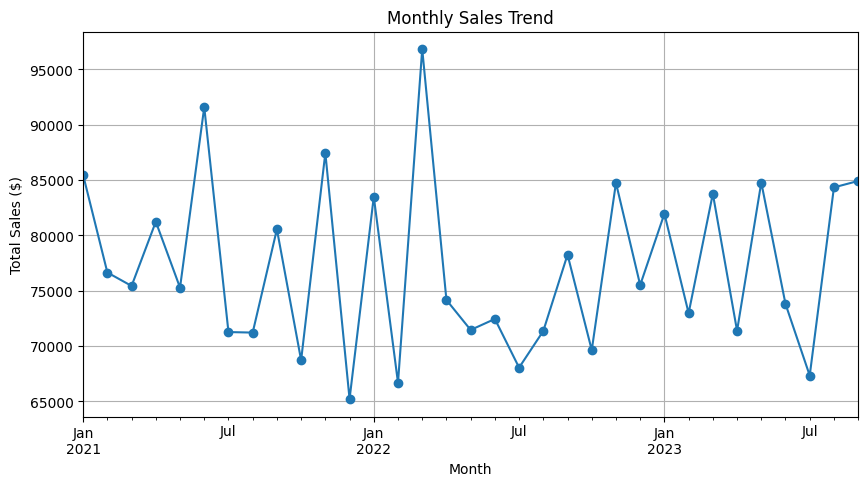

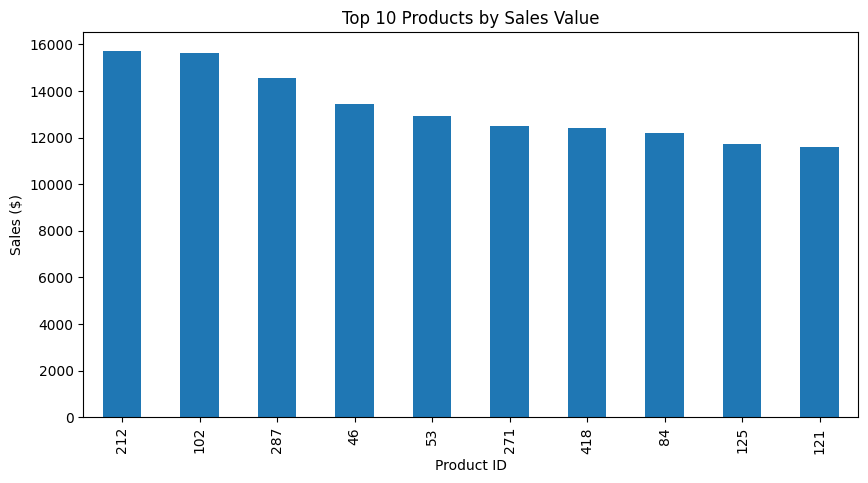

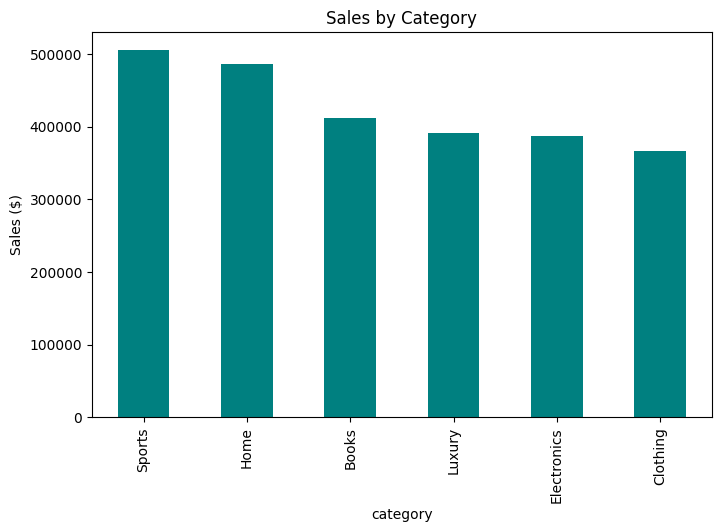

/tmp/ipython-input-2019516140.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby("age_group")["sales_value"].sum()


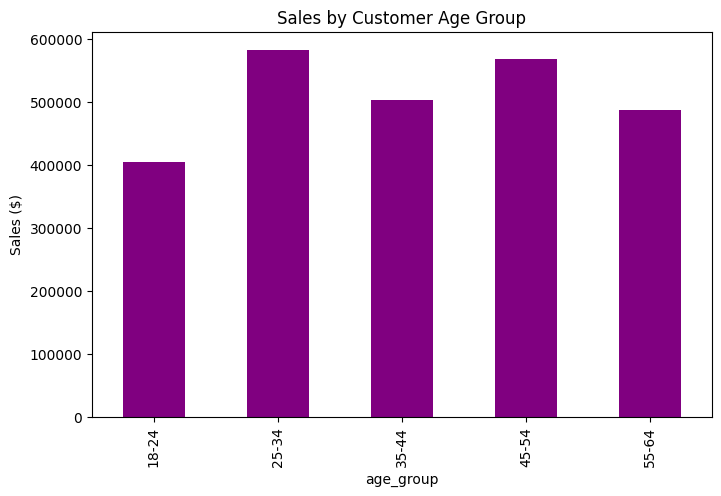

Repeat purchase rate: 97.08%


In [41]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/github/ead/data/cleaned_dataset.csv", parse_dates=["order_date", "signup_date"])

# -----------------------------
# KPI 1: Sales over time
# -----------------------------
df["month"] = df["order_date"].dt.to_period("M")
monthly_sales = df.groupby("month")["sales_value"].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales ($)")
plt.xlabel("Month")
plt.grid(True)
plt.show()

# -----------------------------
# KPI 2: Top 10 products by sales
# -----------------------------
top_products = df.groupby("product_id")["sales_value"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Sales Value")
plt.ylabel("Sales ($)")
plt.xlabel("Product ID")
plt.show()

# -----------------------------
# KPI 3: Sales by category
# -----------------------------
category_sales = df.groupby("category")["sales_value"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
category_sales.plot(kind="bar", color="teal")
plt.title("Sales by Category")
plt.ylabel("Sales ($)")
plt.show()

# -----------------------------
# KPI 4: Customer Segmentation (Age Group)
# -----------------------------
bins = [18,25,35,45,55,65]
labels = ["18-24","25-34","35-44","45-54","55-64"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

age_sales = df.groupby("age_group")["sales_value"].sum()
plt.figure(figsize=(8,5))
age_sales.plot(kind="bar", color="purple")
plt.title("Sales by Customer Age Group")
plt.ylabel("Sales ($)")
plt.show()

# -----------------------------
# KPI 5: Repeat Purchase Rate
# -----------------------------
customer_order_counts = df.groupby("customer_id")["order_id"].nunique()
repeat_customers = (customer_order_counts > 1).sum()
total_customers = customer_order_counts.count()
repeat_rate = repeat_customers / total_customers * 100

print(f"Repeat purchase rate: {repeat_rate:.2f}%")
